In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [5]:
df = pd.read_csv("../Data_logging/122Hz_10thavg_log.txt", sep="' ", header=None)

In [10]:
df.columns = ("xl_x/g", "xl_y/g", "xl_z/g", "gr_x/dps", "gr_y/dps", "gr_z/dps", "mg_x/gauss", "mg_y/gauss", "mg_z/gauss")

In [11]:
df

,xl_x/g,xl_y/g,xl_z/g,gr_x/dps,gr_y/dps,gr_z/dps,mg_x/gauss,mg_y/gauss,mg_z/gauss
0,-0.044103,0.034648,1.015833,-0.573125,-0.175000,-0.126875,-0.618971,-0.060947,0.113856
1,-0.046482,0.035258,1.015711,-0.520625,-0.140000,-0.140000,-0.618386,-0.063139,0.115025
2,-0.044408,0.034953,1.016199,-0.660625,-0.179375,0.096250,-0.621748,-0.058316,0.112102
3,-0.044835,0.035441,1.016809,-0.586250,-0.135625,-0.043750,-0.620579,-0.061678,0.109763
4,-0.044957,0.034770,1.015589,-0.542500,-0.148750,-0.008750,-0.617363,-0.059339,0.112686
...,...,...,...,...,...,...,...,...,...
4315,-0.044896,0.035014,1.017785,-0.630000,-0.131250,-0.052500,-0.623502,-0.049108,0.117071
4316,-0.044652,0.034953,1.016870,-0.586250,-0.122500,0.000000,-0.628325,-0.049547,0.111225
4317,-0.045994,0.035685,1.014674,-0.555625,-0.100625,-0.056875,-0.626425,-0.046331,0.110494
4318,-0.043432,0.036051,1.017663,-0.595000,-0.131250,-0.266875,-0.626133,-0.045893,0.113417


In [30]:
def show_err_prior_calibration(col_name):
    data_to_plot = df[col_name].to_numpy()

    Q1 = np.percentile(data_to_plot, 30, interpolation = 'midpoint')
    Q3 = np.percentile(data_to_plot, 70, interpolation = 'midpoint')


    time_frame = np.linspace(0, len(data_to_plot), len(data_to_plot))/122.07
    #get the best fit line for error calibration
    a, b = np.polyfit(time_frame, data_to_plot, 1)

    plt.figure(figsize=(8, 5), dpi=100)
    plt.xlabel("time/sec")
    y_label = "magnetic field strength mg_x/gauss"
    title = "empty"
    color = "r"

    if (col_name[-5:] == "gauss"):
        y_label = "magnetic_field_strength " + col_name
        title = "magnetic_field_strength(gauss) vs. time(sec)"
        color = "blue"
    elif (col_name[-3:] == "dps"):
        y_label = "angular acceleration " + col_name
        title = "angular_acceleration(degree per sec) vs. time(sec)"
        color = "g"
    else:
        y_label = "linear acceleration " + col_name
        title = "linear_accelertion(g force) vs. time(sec)"
    
    plt.ylabel(y_label)
    plt.title(title)
    plt.ylim(Q1, Q3)
    plt.xlim(np.min(time_frame), np.max(time_frame))
    plt.scatter(time_frame, data_to_plot.T, marker="x", c=color)
    plt.plot(time_frame, a * time_frame + b, color = "black")

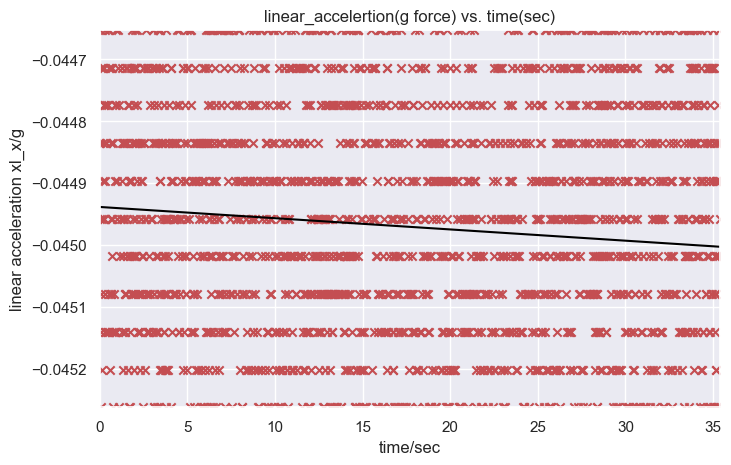

In [34]:
fig1 = show_err_prior_calibration("xl_x/g")

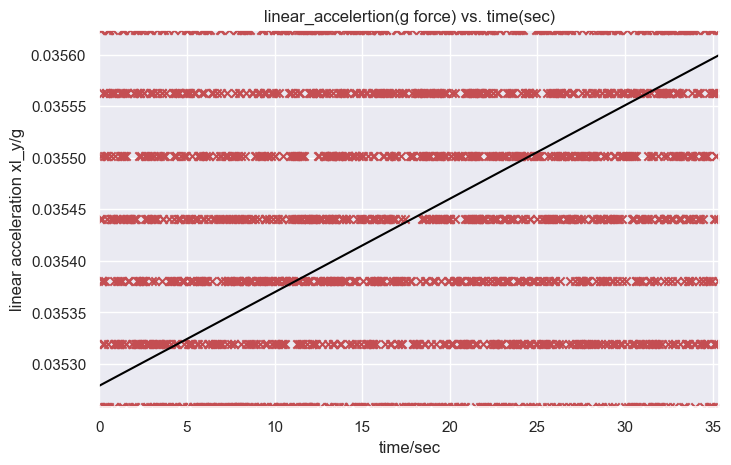

In [35]:
fig1 = show_err_prior_calibration("xl_y/g")

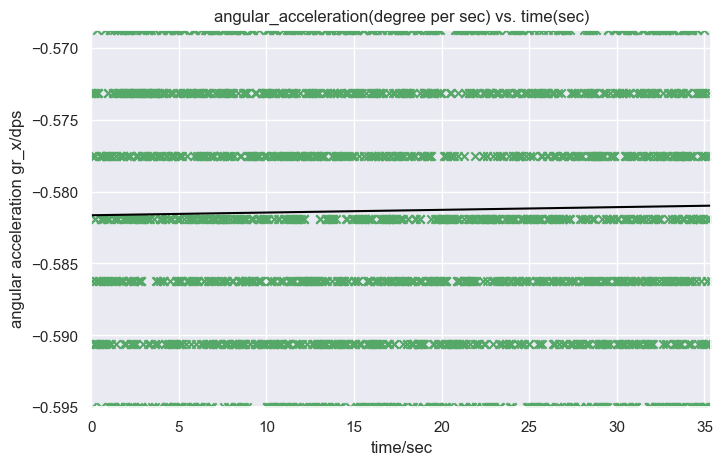

In [31]:
fig1 = show_err_prior_calibration("gr_x/dps")

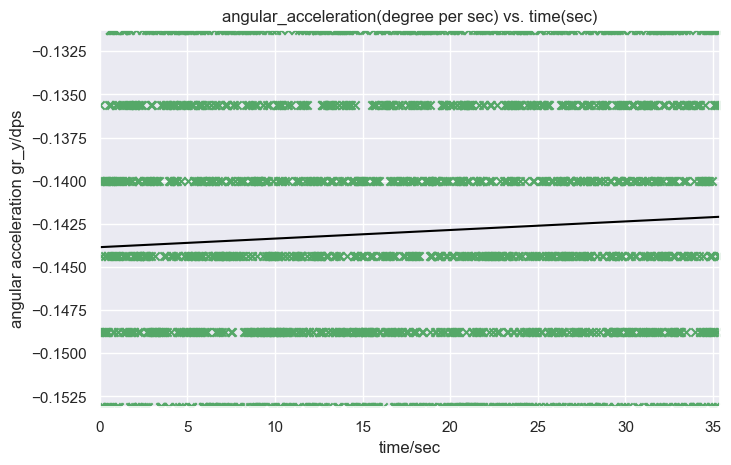

In [32]:
fig1 = show_err_prior_calibration("gr_y/dps")

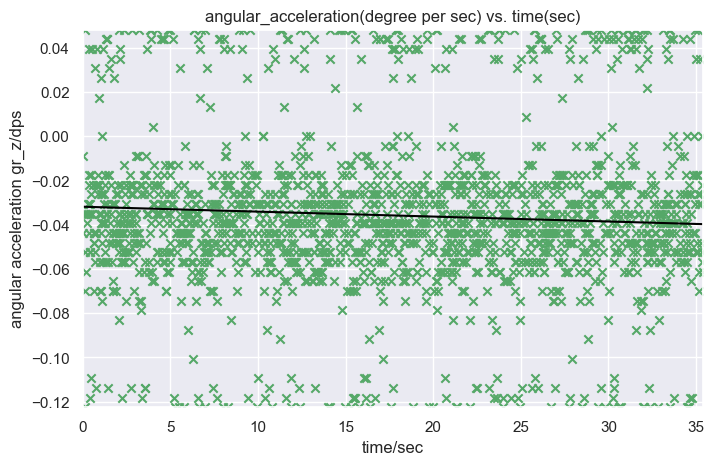

In [33]:
fig1 = show_err_prior_calibration("gr_z/dps")